In [1]:
#データの準備
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

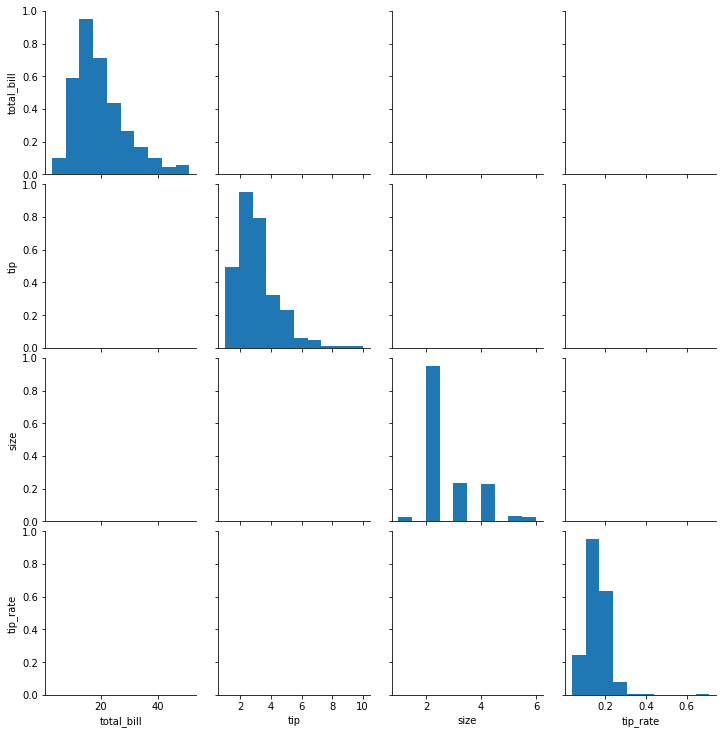

In [2]:
sns.pairplot(df)

## 標本分布

In [3]:
n = 50
m = 100
sample_means = []
column = 'tip'
for i in range(m):
    sampled_df = df.sample(n)
    sample_mean = sampled_df[column].mean()
    sample_means.append(sample_mean)

In [4]:
len(sample_means)

100

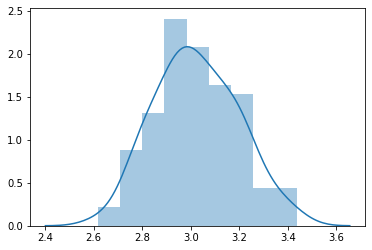

In [5]:
sns.distplot(sample_means)

In [6]:
# 母集団の平均
np.mean(sampled_df[column])

2.9982786885245902

In [7]:
# 標本の平均
np.mean(sample_means)

3.0234060000000005

In [12]:
# 母集団の分散
np.var(sampled_df[column])/n

0.046312387200000006

In [13]:
# 標本の分散
np.var(sample_means)

0.02877777236399997

# 不偏分散

In [3]:
stats.tvar(df['tip'])

1.914454638062471

In [5]:
np.var(df['tip'], ddof=1)

1.9144546380624725

In [6]:
# 不偏分散の平方根
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [7]:
stats.tstd(df['tip'])

1.3836381890011822

In [8]:
np.std(df['tip'], ddof=1)

1.3836381890011826

## 不偏分散の不偏性

In [11]:
n = 50
m = 100
column = 'tip'
sample_vars = []
sample_uvars = []
for i in range(m):
    sample_df = df.sample(n)
    sample_var = np.var(sample_df[column])
    sample_uvar = stats.tvar(sample_df[column])
    sample_vars.append(sample_var)
    sample_uvars.append(sample_uvar)

In [12]:
#　標本の不偏分散の平均
np.mean(sample_uvars)

1.8244601248979593

In [13]:
# 母分散
np.var(df[column])

1.9066085124966428

In [14]:
# 標本の分散の平均
np.mean(sample_vars)

1.7879709224000002

# 比率の区間推定

In [3]:
stats.binom.interval(0.95, 1000, 0.6)

(570.0, 630.0)

In [4]:
stats.binom.interval(0.99, 1000, 0.6)

(560.0, 640.0)

In [8]:
n = 50
m = 500
alpha = 0.95
population_male_ratio = len(df[df['sex']=='Male']) / len(df)
results = []
for _ in range(m):
    sample_df = df.sample(n)
    male_ratio = len(sample_df[sample_df['sex']=='Male'])/len(sample_df)
    min_num, max_num = stats.binom.interval(alpha, n=n, p=male_ratio)
    min_ratio = min_num/n
    max_ratio = max_num/n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append({'min':min_ratio, 'max':max_ratio, 'correct':correct})

In [13]:
result_df = pd.DataFrame(results)
result_df['correct'].value_counts()

True     482
False     18
Name: correct, dtype: int64

In [9]:
correct

True

In [10]:
min_ratio

0.38

In [11]:
max_ratio

0.66

In [12]:
population_male_ratio

0.6434426229508197

# 平均の区間推定

In [20]:
column = 'tip'
alpha = 0.95
n = 50
m = 100
population_mean = df[column].mean()
results = []
for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = sample_df[column].mean()
    sample_var = stats.tvar(sample_df[column])
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min':min_val, 'max':max_val, 'correct':correct})

In [21]:
population_mean

2.9982786885245902

In [24]:
result_df = pd.DataFrame(results)
result_df

,min,max,correct
0,2.322784,3.187216,True
1,2.592385,3.395615,True
2,2.375855,3.182945,True
3,2.770350,3.713650,True
4,2.702944,3.503456,True
...,...,...,...
95,2.554356,3.186844,True
96,2.599504,3.314096,True
97,2.424717,3.004483,True
98,2.493699,3.177501,True


In [25]:
result_df['correct'].value_counts()

True     97
False     3
Name: correct, dtype: int64

# t分布

In [1]:
a = 'hello'
f"{a} world"

'hello world'

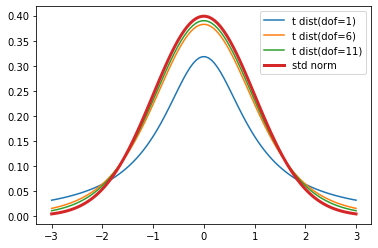

In [7]:
x = np.linspace(-3, 3, 100)
z = stats.norm.pdf(x)
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label="std norm", linewidth=3)
plt.legend()

In [5]:
list(range(1, 12, 5))

[1, 6, 11]

# 平均の区間推定（t分布）

In [9]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [12]:
column = 'tip'
alpha = 0.95
n =50
population_mean = df[column].mean()

sample_df = df.sample(n)
sample_mean = sample_df[column].mean()
sample_var = stats.tvar(sample_df[column])
min_val_norm, max_val_norm = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)

In [13]:
population_mean

2.9982786885245902

In [14]:
sample_mean

3.2746

In [15]:
print(min_val_norm, max_val_norm)

2.8281644831401507 3.7210355168598492


In [16]:
print(min_val_t, max_val_t)

2.816864161201678 3.732335838798322
